In [1]:
#draw_heatmap.r              20.01.20
#hur.benjamin@mayo.edu
#
#[1] Draw heatmap from given list
#[2] Designed to run this script i x j times (i = input matrix from DESeq2 results, j = predefined gene list)
#
#Memo: Drawing heatmap in case of "TREE CUT"
#
#cmd: Rscript draw_heatmap.r [input deg matrix] [input predefined gene list] [output prefix]

#Don't learn anything in this stupid script...
 
library(gplots)
library(pheatmap)
library(RColorBrewer)

#for cut-tree, currently not in use
#library(dendextend)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [2]:
get_barcode <- function(subset_df_pval, pval_cutline)
{
    barcode <- 0
    if (subset_df_pval < pvalue_cutline)
    {
        barcode <- 1
    }
    return(barcode)
}

get_df <- function(data_file)
{
    deg_df <-read.csv(data_file, sep=",", header=TRUE, row.names=1)
    deg_df <- as.data.frame(deg_df)
    return (deg_df)
}

remove_na <- function(df)
{
    df <- df[complete.cases(df),]
    return(df)
}

get_subset_df <- function(df, gene_list)
{
    subset_df <- subset(df, rownames(df) %in% gene_list)
    return (subset_df)
}

[1] "character"

[1] 15112
[1] 15112
[1] 15112
[1] 352
[1] 352
[1] 352


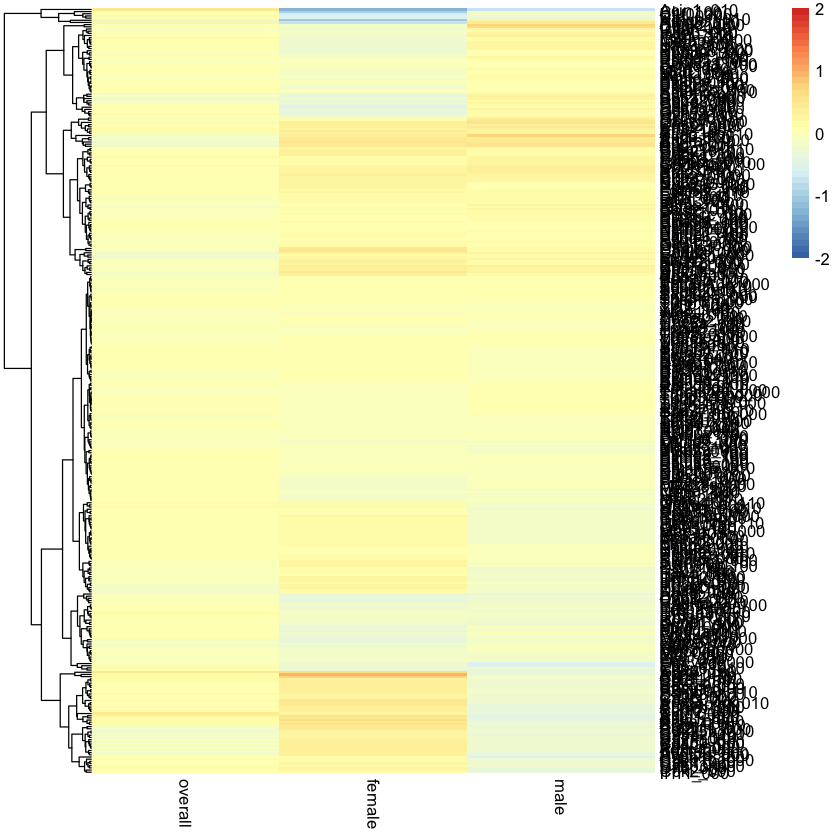

In [31]:
df <- get_df('/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.overall.deg.csv')
f_df <- get_df('/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.male.deg.csv')
m_df <- get_df('/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.female.deg.csv')

df <- remove_na(df)
f_df <- remove_na(f_df)
m_df <- remove_na(m_df)
    
df_gene_list <- row.names(df)
f_df_gene_list <- row.names(f_df)
m_df_gene_list <- row.names(m_df)

common_gene_list <- intersect(intersect(df_gene_list,m_df_gene_list),f_df_gene_list)
typeof(common_gene_list)


df <- get_subset_df(df, common_gene_list)
f_df <- get_subset_df(f_df, common_gene_list)
m_df <- get_subset_df(m_df, common_gene_list)

print (length(row.names(df)))
print (length(row.names(f_df)))
print (length(row.names(m_df)))

predefined_gene_list <- '/Users/m221138/Scarisbrick_Project/RNAseq/analysis/gene_list_v1/Apoptosis.list'
predefined_gene_list <- read.csv(predefined_gene_list, header=FALSE)$V1
predefined_gene_list <- as.character(predefined_gene_list)


subset_df <- get_subset_df(df, predefined_gene_list)
subset_f_df <- get_subset_df(f_df, predefined_gene_list)
subset_m_df <- get_subset_df(m_df, predefined_gene_list)

print (length(row.names(subset_df)))
print (length(row.names(subset_f_df)))
print (length(row.names(subset_m_df)))


heatmap_ready_df <- data.frame(overall= subset_df$log2FoldChange, 
                               female=subset_f_df$log2FoldChange,
                               male=subset_m_df$log2FoldChange)

predefined_gene_list <- intersect(predefined_gene_list, common_gene_list)

pvalue_cutline <- 0.05
gene_name_with_barcode_list <- c()
for (gene_name in predefined_gene_list)
{
    barcode_list <- c(0,0,0)
    subset_df_pval <- subset_df[gene_name,"pvalue"]
    subset_f_df_pval <- subset_f_df[gene_name,"pvalue"]
    subset_m_df_pval <- subset_m_df[gene_name,"pvalue"]
    
    barcode_list[0] <- get_barcode(subset_df_pval, pvalue_cutline)
    barcode_list[1] <- get_barcode(subset_f_df_pval, pvalue_cutline)
    barcode_list[2] <- get_barcode(subset_m_df_pval, pvalue_cutline)

    gene_name_with_barcode <- paste(gene_name,'_', barcode_list[1], barcode_list[2],barcode_list[3],sep="")
    #print (gene_name_with_barcode)
    gene_name_with_barcode_list <- c(gene_name_with_barcode_list, gene_name_with_barcode)
}

rownames(heatmap_ready_df) <- gene_name_with_barcode_list
heatmap_ready_df <- as.matrix(heatmap_ready_df)

#my_palette <- colorRampPalette(c("lightblue", "yellow", "red"))(n = 20)

break_list = seq(-2,2, by=0.1)
color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
pheatmap(heatmap_ready_df, breaks=break_list, color=color,cluster_cols=FALSE)